In [37]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Dataset loading
Loading the dataset, the pixel values of Sentinel2 and carbon values were already mergen in Qgis
The line used for outlier removal is commented

In [38]:
df = pd.read_csv ('input/df_merged_allbands.csv')

df=df.drop(columns=['id', 'fid'])   
df=df.dropna() 

#oulier removal
#df = df[df['Carb.m1'].between(df['Carb.m1'].quantile(.15), df['Carb.m1'].quantile(.85))] 

s2_sr_df=df
s2_sr_df.head()

,Carb.m1,B12,B11,B8A,B7,B6,B5,WVP,B8,B4,B3,B2,AOT
0,1.244373,1634,2388,2780,2488,2093,960,2078,2770,621,617,381,78
1,1.493248,1408,2169,3076,2808,2212,842,2189,2886,488,502,305,78
2,2.654662,1263,2075,3123,2869,2257,792,2198,2976,385,469,262,78
3,1.693730,1316,2063,3030,2802,2214,792,2198,2812,423,477,296,78
4,0.553055,1298,2032,3132,2888,2305,741,2338,2940,367,453,262,78


All the pixel band values were normalzied

In [39]:
s2_sr_df.iloc[:,1:]=preprocessing.normalize(s2_sr_df.iloc[:,1:])
s2_sr_df.head()

,Carb.m1,B12,B11,B8A,B7,B6,B5,WVP,B8,B4,B3,B2,AOT
0,1.244373,0.256752,0.375229,0.436825,0.390943,0.328876,0.150846,0.326519,0.435254,0.097579,0.096950,0.059867,0.012256
1,1.493248,0.213860,0.329448,0.467212,0.426506,0.335980,0.127891,0.332486,0.438353,0.074122,0.076249,0.046326,0.011847
2,2.654662,0.190976,0.313757,0.472223,0.433816,0.341277,0.119757,0.332355,0.449995,0.058215,0.070917,0.039617,0.011794
3,1.693730,0.203578,0.319135,0.468725,0.433455,0.342494,0.122518,0.340019,0.435002,0.065436,0.073789,0.045790,0.012066
4,0.553055,0.194906,0.305123,0.470298,0.433659,0.346116,0.111268,0.351072,0.441467,0.055108,0.068022,0.039342,0.011712


# Caluculatiing spectral indices
The same spectral indices were used as in Mangroves hackathon

In [40]:
 # NDVI
s2_sr_df['NDVI']=(s2_sr_df["B8"] - s2_sr_df["B4"]) / (s2_sr_df["B8"] + s2_sr_df["B4"])
# GNDVI
s2_sr_df['GNDVI']=(s2_sr_df["B8"] - s2_sr_df["B3"]) / (s2_sr_df["B8"] + s2_sr_df["B3"]) 
# Simple ratio
s2_sr_df['SR'] = (s2_sr_df ["B8"])/(s2_sr_df["B3"])

# Simple Ratio NIR/RED Difference Vegetation Index
s2_sr_df['DVI'] = s2_sr_df["B8"]/s2_sr_df["B4"]
# Red edge simple ratio
s2_sr_df['SRre'] = s2_sr_df ["B8"]/s2_sr_df["B5"] 

# Enhanced Vegetation Index
s2_sr_df['EVI'] = 2.5*(s2_sr_df["B8"] - s2_sr_df["B4"]) / (s2_sr_df["B8"] + 6*s2_sr_df["B4"]- 7.5*s2_sr_df["B2"] + 1) 
# Wide Dynamic Range Vegetation Index
s2_sr_df['WDRVI'] =(0.1*s2_sr_df["B8"] - s2_sr_df["B4"]) / (0.1*s2_sr_df["B8"] + s2_sr_df["B4"])
# Aerosol free vegetation index 1600
# s2_sr_df['AFRI1600'] = s2_sr_df["B8"] - 0.66*s2_sr_df["B11"] / (s2_sr_df["B8"] + 0.66*s2_sr_df["B11"]) 
# Aerosol free vegetation index 2100
# s2_sr_df['AFRI2100'] = s2_sr_df["B8"] - 0.5*s2_sr_df["B12"] / (s2_sr_df["B8"] + 0.56*s2_sr_df["B12"]) 

#Canopy Chlorophyll Content Index
s2_sr_df['CCCI']=((s2_sr_df["B8"] - s2_sr_df["B5"]) / (s2_sr_df["B8"] + s2_sr_df["B5"]))/((s2_sr_df["B8"] - s2_sr_df["B4"]) / (s2_sr_df["B8"] + s2_sr_df["B4"])) 
# Chlorophyll vegetation index
s2_sr_df['CVI']= s2_sr_df["B8"]*s2_sr_df["B4"]/(s2_sr_df["B3"])**2  
# Chlorophyll index green
s2_sr_df['CIgreen'] = s2_sr_df["B8"]/s2_sr_df["B3"] - 1 
# Green leaf index
s2_sr_df['GLI'] = (2*s2_sr_df["B3"]-s2_sr_df["B4"]-s2_sr_df["B2"])/(2*s2_sr_df["B3"]+s2_sr_df["B4"]+s2_sr_df["B2"])
# Leaf Chlorophyll Index
s2_sr_df['LCI'] = (s2_sr_df["B8A"]-s2_sr_df["B5"])/(s2_sr_df["B8A"]+s2_sr_df["B4"]) 

 # Normalized Difference Salinity Index
# s2_sr_df['NDSI']=(s2_sr_df["B11"] - s2_sr_df["B12"]) / (s2_sr_df["B11"] + s2_sr_df["B12"])
 # Soil Composition Index
# s2_sr_df['SCI']=(s2_sr_df["B11"] - s2_sr_df["B8"]) / (s2_sr_df["B11"] + s2_sr_df["B8"])

data = s2_sr_df.iloc[:,np.r_[slice(0,s2_sr_df.shape[1])]]
data.head()

,Carb.m1,B12,B11,B8A,B7,B6,B5,WVP,B8,B4,...,SR,DVI,SRre,EVI,WDRVI,CCCI,CVI,CIgreen,GLI,LCI
0,1.244373,0.256752,0.375229,0.436825,0.390943,0.328876,0.150846,0.326519,0.435254,0.097579,...,4.489465,4.460548,2.885417,0.537110,-0.383073,0.765704,4.518570,3.489465,0.103757,0.535137
1,1.493248,0.213860,0.329448,0.467212,0.426506,0.335980,0.127891,0.332486,0.438353,0.074122,...,5.749004,5.913934,3.427553,0.592964,-0.256760,0.771438,5.588673,4.749004,0.117418,0.626824
2,2.654662,0.190976,0.313757,0.472223,0.433816,0.341277,0.119757,0.332355,0.449995,0.058215,...,6.345416,7.729870,3.757576,0.652027,-0.128040,0.751870,5.208923,5.345416,0.183596,0.664481
3,1.693730,0.203578,0.319135,0.468725,0.433455,0.342494,0.122518,0.340019,0.435002,0.065436,...,5.895178,6.647754,3.550505,0.622502,-0.201363,0.758970,5.227800,4.895178,0.140466,0.648132
4,0.553055,0.194906,0.305123,0.470298,0.433659,0.346116,0.111268,0.351072,0.441467,0.055108,...,6.490066,8.010899,3.967611,0.653935,-0.110439,0.767810,5.257957,5.490066,0.180456,0.683338


# Train/test split


In [41]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,1:]
y = data.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.head()

,B12,B11,B8A,B7,B6,B5,WVP,B8,B4,B3,...,SR,DVI,SRre,EVI,WDRVI,CCCI,CVI,CIgreen,GLI,LCI
781,0.218213,0.355617,0.454584,0.409943,0.341392,0.151024,0.335793,0.427346,0.080052,0.086256,...,4.954386,5.338374,2.829659,0.566318,-0.303919,0.698009,4.598018,3.954386,0.140570,0.567789
554,0.265746,0.404516,0.433347,0.389663,0.324574,0.172116,0.317293,0.404224,0.104260,0.106735,...,3.787176,3.877095,2.348562,0.494504,-0.441224,0.682684,3.699342,2.787176,0.105581,0.485915
732,0.271311,0.379576,0.431474,0.393127,0.319173,0.175156,0.315857,0.438538,0.084478,0.082316,...,5.327496,5.191126,2.503704,0.574789,-0.316558,0.633977,5.467447,4.327496,0.086068,0.496787
547,0.248290,0.380236,0.449618,0.399626,0.328275,0.146641,0.314641,0.429318,0.089227,0.089378,...,4.803390,4.811545,2.927686,0.553001,-0.350298,0.748325,4.795248,3.803390,0.100233,0.562272
538,0.266904,0.416206,0.434886,0.391213,0.335964,0.187188,0.285188,0.398843,0.106682,0.099711,...,4.000000,3.738594,2.130710,0.459930,-0.455753,0.624928,4.279683,3.000000,0.089080,0.457372


# Correlation calculation

In [42]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))


norm = MidpointNormalize(vmin=-1, vmax=1, midpoint=0)
cmap = 'RdBu_r'

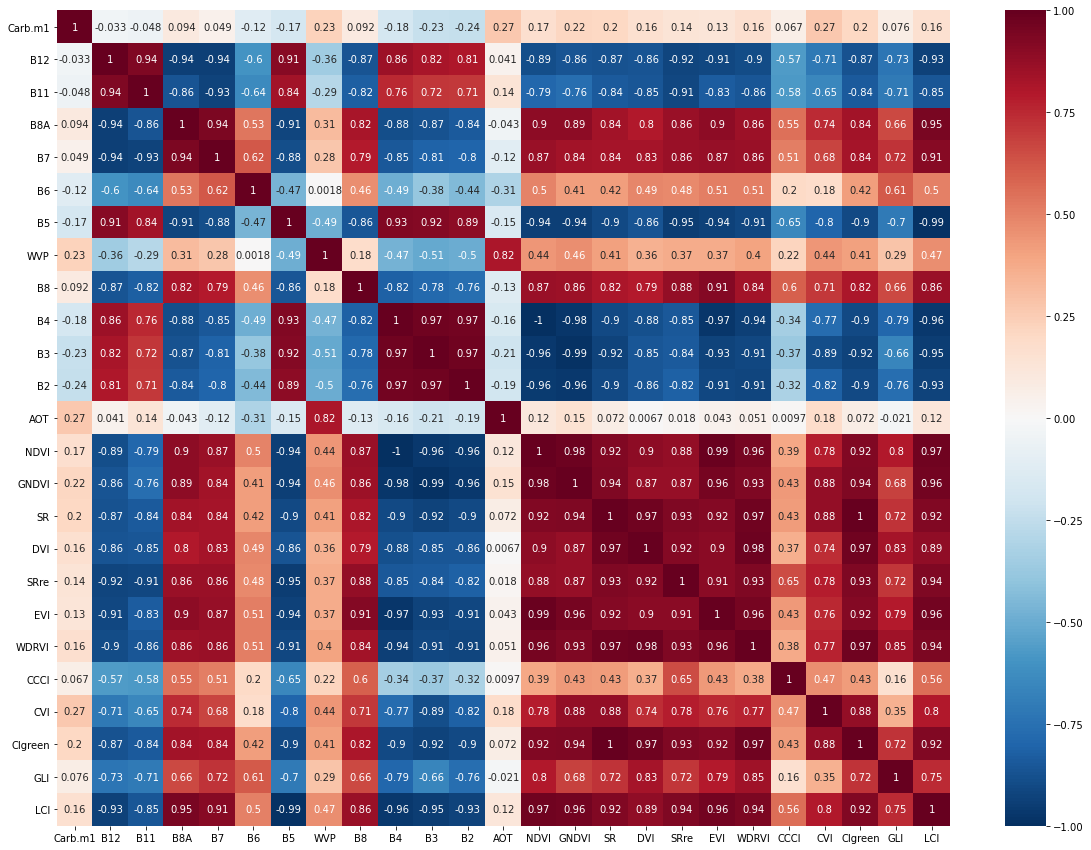

In [43]:
plt.figure(figsize=(20,15))
cor = pd.concat([y_train, X_train], axis=1).corr() # method: 'pearson','spearman'
sns.heatmap(cor, annot=True, cmap=cmap, norm = norm)
plt.show()

Sort the features according to correlation coefficient with carbon values

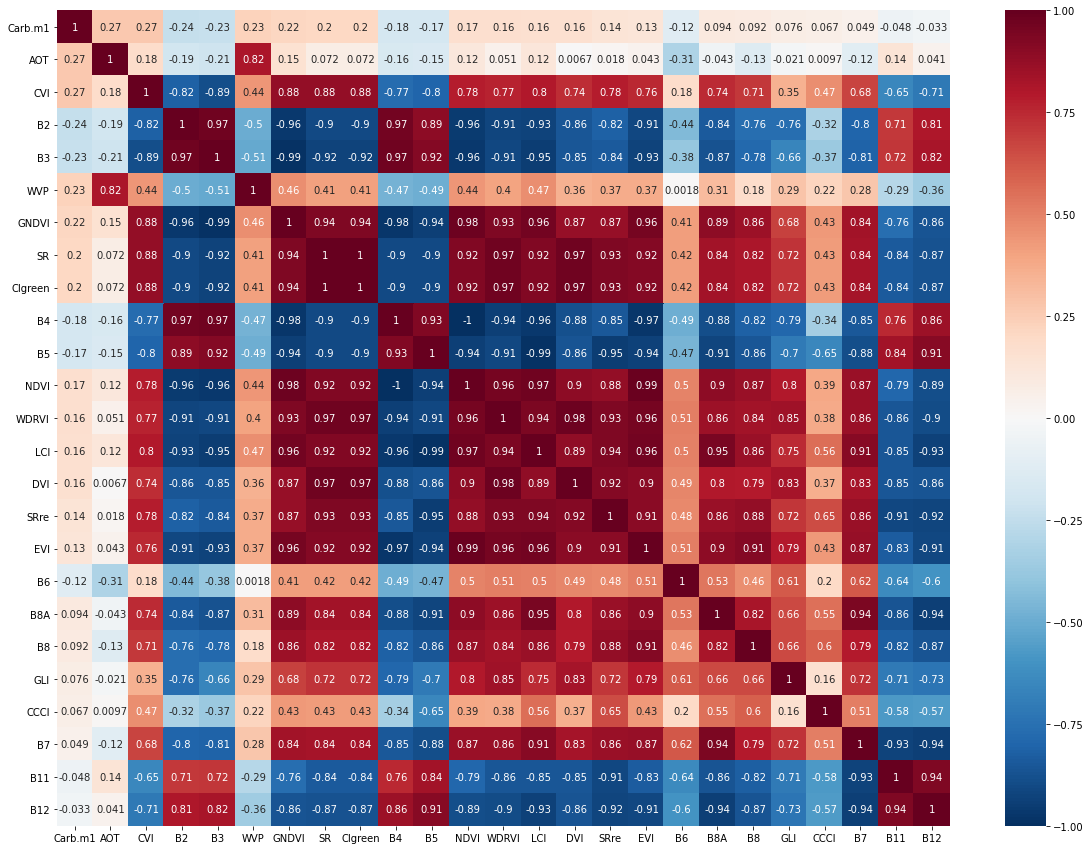

In [44]:
cor['carb']=abs(cor['Carb.m1'])
cor_s = cor.sort_values('carb', ascending=False)

plt.figure(figsize=(20,15))
sns.heatmap(cor_s[cor_s.index], annot=True, cmap=cmap, norm = norm)
plt.show()

The spectral indices and bands that cooralte with carbon values the most

In [45]:
Num_features = 10

feat = cor_s.index[1:(Num_features+2)].to_list()
feat

['AOT', 'CVI', 'B2', 'B3', 'WVP', 'GNDVI', 'SR', 'CIgreen', 'B4', 'B5', 'NDVI']

In [46]:
from sklearn.ensemble import RandomForestRegressor

#model = RandomForestRegressor(max_depth=6, random_state=0)
model = RandomForestRegressor()
model.fit(X_train[feat], y_train)

print('Score for model on training data:',model.score(X_train[feat], y_train))
print('Score for model on testig data:',model.score(X_test[feat], y_test))

Score for model on training data: 0.8821928762907907
Score for model on testig data: 0.1780323612194964


In [47]:
pred_train = model.predict(X_train[feat])
pred_test = model.predict(X_test[feat])


Let's print the true carbon values and the predictions of our algorithm

In [48]:
res_test = pd.DataFrame(y_test)
res_test['Predicted_values']=pred_test
res_test.head()

,Carb.m1,Predicted_values
527,2.875884,1.006006
853,1.493248,1.093193
706,1.863103,1.964174
563,1.493248,1.382313
462,0.553055,0.571172


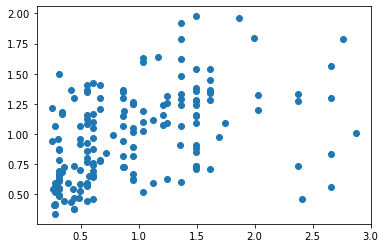

In [49]:
plt.scatter(res_test.iloc[:,0],res_test.iloc[:,1])

In [50]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

Mean Absolute Error: 0.40858791327301436
Mean Squared Error: 0.3155722837681735
Root Mean Squared Error: 0.5617582075663634
